<a href="https://colab.research.google.com/github/gabrielamorales02/IntroMachineLearning/blob/main/TallerRegresion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Completo de Regresión Lineal

Este notebook muestra paso a paso cómo realizar un análisis de **Regresión Lineal** empleando un conjunto de datos que contiene:
- **valuationdate**: fecha de valoración (opcional para el modelo)
- **revenues**: ingresos
- **ebit**: utilidad antes de intereses e impuestos
- **depreciation**: depreciación
- **capex**: gastos de capital
- **ncwc**: cambio en capital de trabajo neto
- **bv**: (posiblemente) valor en libros
- **y**: variable objetivo que deseamos predecir (por ejemplo, un valor financiero o de valoración)

Iremos desde la **carga** y **exploración** del dataset hasta la **interpretación** de coeficientes y la **evaluación** de métricas importantes.

In [2]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv

--2025-03-05 21:48:07--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv [following]
--2025-03-05 21:48:08--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82415 (80K) [text/plain]
Saving to: ‘enterprise.csv.1’

enterprise.csv.1    100%[==========

## Paso 0: Importar librerías y configuración

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

## Paso 1: Carga y Exploración de Datos (EDA)

En este primer bloque, cargaremos nuestro dataset y realizaremos un Análisis Exploratorio básico.

In [4]:
df = pd.read_csv('enterprise.csv')

In [5]:
print(df.head())

  valuationdate    revenues          ebit  depreciation      capex  \
0    30/06/2011  86470.7000  10387.500000      6429.000   3512.000   
1    31/12/2010  84754.2000  14031.180800      8658.600  17172.500   
2    30/09/2016  15653.4800    221.347452       647.239    749.478   
3    30/09/2018  62001.3297   7551.761957      1808.830   2702.850   
4    30/09/2014   1242.8300    497.141501       232.027   1552.908   

          ncwc         bv             y  
0  16848.90000  47945.100   91760.80000  
1  12095.10000  66804.400  184461.70000  
2   1468.42800  10128.726   23323.68520  
3  11873.25464  27144.930  130202.79240  
4    149.97100   1463.052   11472.12267  


In [6]:
print(df.describe())

           revenues           ebit   depreciation          capex  \
count  1.061000e+03    1061.000000    1061.000000    1061.000000   
mean   1.632727e+05   24076.406810    8002.050367   10961.602205   
std    2.213828e+05   31871.076559   13898.135849   20250.735197   
min    8.560000e+01  -29982.979880      -5.690000    -694.661000   
25%    4.265958e+04    4522.900000     999.340000    1666.600000   
50%    1.082011e+05   12224.611950    3446.250000    4949.447000   
75%    1.862485e+05   32228.941870    8361.220000   11201.479000   
max    2.586712e+06  289541.300000  128993.500000  205525.700000   

                ncwc            bv             y  
count    1061.000000  1.061000e+03  1.061000e+03  
mean    22324.130946  8.057162e+04  3.292238e+05  
std     54636.421540  1.043500e+05  4.056701e+05  
min   -118819.899000 -1.503965e+04  3.692000e+02  
25%      3115.247000  1.689500e+04  6.981010e+04  
50%     10736.200000  4.172290e+04  1.850416e+05  
75%     23454.185000  1.147563

### Estadísticas Descriptivas y Distribuciones

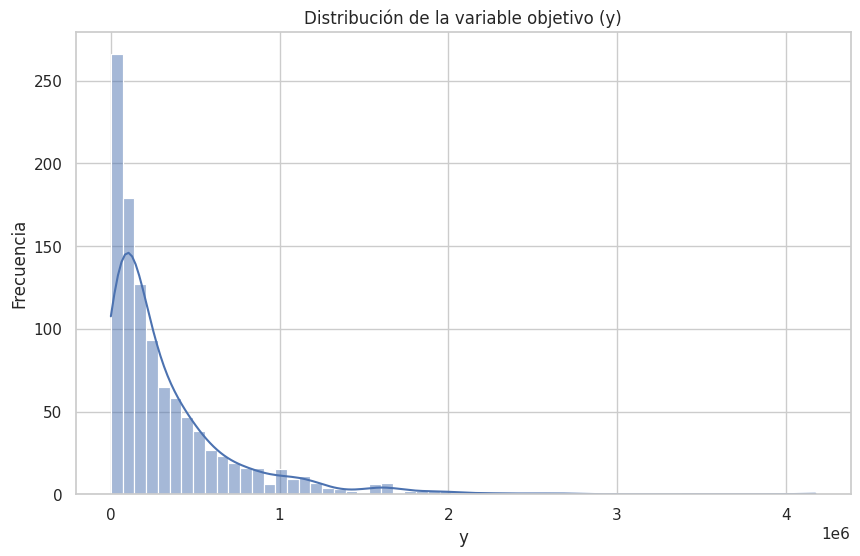

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['y'], kde=True)
plt.title('Distribución de la variable objetivo (y)')
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.show()

### Preguntas de Reflexión (Exploración)
1. ¿Qué tipo de problema estás intentando resolver al usar `y` como variable objetivo?
2. ¿Notas valores atípicos (outliers) en alguna de las variables? ¿Cómo podría afectar a la regresión lineal?
3. ¿Crees que la columna `valuationdate` podría aportar información para predecir `y`, o la excluirías del análisis?

_Responde con tu razonamiento propio aquí._

1. Es probable que se trate de un problema de valoración empresarial posiblemente el valor de mercado, el valor de la empresa, en función de sus indicadores financieros.

2.  Los valores atípicos pueden afectar la regresión lineal de varias maneras: Sesgo en los coeficientes: los outliers pueden influir significativamente en la estimación de los coeficientes de la regresión, generando un modelo menos preciso para la mayoría de los datos. Mayor error cuadrático medio (MSE):  Los outliers aumentan el MSE,  una métrica que mide la diferencia entre los valores predichos y reales. Menor R^2:  Una mayor presencia de outliers puede reducir el R^2, que mide la bondad de ajuste del modelo.

3. La columna valuationdate podría aportar información relevante, especialmente si el valor de la empresa está sujeto a variaciones a lo largo del tiempo.
Si se incluyen datos a lo largo de varios períodos, es posible que exista una tendencia o estacionalidad relacionada con la fecha de valoración.


## Paso 2: Preparación y Limpieza de Datos

1. **Manejo de valores faltantes**.
2. **Posible eliminación** o **imputación** de outliers.
3. **Transformaciones** (escalado, log, etc.) si son necesarias.

### Pregunta de Reflexión (Limpieza)
¿Por qué es relevante tratar valores faltantes y/o outliers **antes** de entrenar el modelo de regresión lineal?

_Responde con tu razonamiento aquí._

 la limpieza de datos es muy importante en la preparación de datos para modelos de regresión lineal. Manejar los valores faltantes y los outliers adecuadamente permite generar modelos más robustos, precisos y con una interpretación más confiable.


## Paso 4: Selección de Variables e Implementación del Modelo

1. **Seleccionar** cuáles columnas usarás como variables explicativas (features). Puede que uses todas o hagas una selección.
2. **Asignar** `X` (features) y `y` (variable objetivo).
3. **Dividir** en conjunto de entrenamiento (train) y conjunto de prueba (test).

In [24]:
X = df[['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape


(525, 6)

### Preguntas de Reflexión (Selección de Variables)
1. ¿Por qué es importante separar los datos en train y test?
2. ¿Qué pasaría si entrenas y evalúas en el **mismo** conjunto de datos?

_Responde con tu razonamiento._

1. Separar los datos en conjuntos de train y test es importante para evaluar objetivamente el rendimiento de un modelo de aprendizaje automático. El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, mientras que el conjunto de prueba proporciona una estimación imparcial de cómo se desempeñará el modelo con datos nuevos e invisibles durante el entrenamiento. Si se evalúa el modelo en los mismos datos en los que se entrenó, se obtendrá una estimación optimista y sesgada del rendimiento, ya que el modelo ya conoce los datos de prueba y podría estar sobreajustado (overfitting).

2. Si se entrena y evalúa el modelo en el mismo conjunto de datos, se corre el riesgo de sobreajuste.  El modelo aprenderá los datos de entrenamiento demasiado bien, incluyendo el ruido y las particularidades de estos datos, lo que resultará en un excelente rendimiento en el conjunto de entrenamiento, pero un rendimiento pobre con datos nuevos y reales. Es decir, el modelo memoriza el conjunto de entrenamiento en lugar de aprender los patrones generales subyacentes que le permitan generalizar a nuevos datos.  La evaluación del modelo en el mismo conjunto de datos con el que se entrenó no refleja la capacidad del modelo para generalizar, lo cual es el objetivo principal de cualquier modelo de machine learning.


## Paso 5: Entrenar el Modelo de Regresión Lineal
Usaremos la clase `LinearRegression` de scikit-learn.

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Interpretación de Coeficientes
Si la lista de features es `["revenues", "ebit", "depreciation", "capex", "ncwc", "bv"]` y tu `model.coef_` es algo como `[a, b, c, d, e, f]`, entonces:

\[ y \approx \beta_0 + a\cdot revenues + b\cdot ebit + c\cdot depreciation + d\cdot capex + e\cdot ncwc + f\cdot bv \]

Cada coeficiente indica cómo cambia `y` en promedio **por cada unidad** que se incrementa la variable (manteniendo las demás constantes).

In [22]:
intercept = model.intercept_
coef = model.coef_[0]
print(f"Intercept (beta_0): {intercept:.2f}")
print(f"Coeficiente (beta_1): {coef:.2f}")

Intercept (beta_0): 9899.01
Coeficiente (beta_1): 0.01


## Paso 6: Evaluación y Validación del Modelo
Usaremos las siguientes métricas:
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coeficiente de Determinación)**

In [23]:

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)


mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Conjunto de Entrenamiento:")
print(f"MSE: {mse_train:.2f}")
print(f"R^2: {r2_train:.2f}")
print("\nConjunto de Prueba:")
print(f"MSE: {mse_test:.2f}")
print(f"R^2: {r2_test:.2f}")

Conjunto de Entrenamiento:
MSE: 2242515099.11
R^2: 0.79

Conjunto de Prueba:
MSE: 2451454626.47
R^2: 0.75


### Preguntas de Reflexión (Evaluación)
1. ¿Por qué comparamos las métricas en **Entrenamiento** vs **Prueba**?
2. ¿Qué significa si el error en entrenamiento es **muy** distinto (mucho menor o mucho mayor) que en prueba?
3. ¿Cómo interpretar un **R²** cercano a 1, cercano a 0 o incluso negativo?

_Responde con tu razonamiento._

1. Comparamos las métricas de entrenamiento y prueba para evaluar cómo generaliza el modelo. El rendimiento en entrenamiento muestra cómo se ajusta a los datos con los que se entrenó, pero lo importante es ver cómo se comporta con datos nuevos, representados por el conjunto de prueba. Una gran diferencia entre ambas métricas puede indicar sobreajuste o subajuste.

2. Si el error en entrenamiento es mucho menor que en prueba, hay sobreajuste: el modelo ha aprendido demasiado de los detalles del entrenamiento y no generaliza bien. Si el error en entrenamiento es mucho mayor que en prueba, puede haber subajuste: el modelo es demasiado simple y no se ajusta bien ni a los datos de entrenamiento ni a los de prueba.

3. El coeficiente de determinación (R²) mide qué tan bien el modelo explica la variabilidad de los datos. Un R² cercano a 1 indica buen ajuste, mientras que un R² cercano a 0 muestra que el modelo no es útil. Un R² negativo sugiere que el modelo es peor que usar solo la media de los datos.


## Paso 8: Interpretación y Conclusiones

1. **Revisa** los coeficientes: ¿son consistentes con la lógica de negocio? (p.ej., si `ebit` aumenta, esperas que `y` aumente o disminuya?).
2. **Observa** el nivel de error y R²: ¿el modelo es suficientemente bueno para su uso práctico?
3. **Considera** la posibilidad de:
   - Añadir más variables.
   - Aplicar **regresiones polinómicas** (X², X³) si sospechas no linealidad.
   - Usar **regularización** (Ridge, Lasso) si hay multicolinealidad o se requieren coeficientes más estables.

### Preguntas de Reflexión Final
1. ¿Crees que la Regresión Lineal Simple/Múltiple **captura adecuadamente** las relaciones en tus datos?
2. ¿Qué otras técnicas (ej. árboles de decisión, bosques aleatorios, etc.) considerarías para comparar resultados?
3. ¿El dataset es suficientemente grande y variado para hacer conclusiones robustas?

_Responde con tu razonamiento._

1. Es difícil saberlo sin una exploración más profunda de los datos y un análisis detallado del modelo. La regresión lineal asume relaciones lineales entre las variables predictoras y la variable objetivo. Si estas relaciones son no lineales, la regresión lineal puede no ser adecuada. Es importante analizar los residuales para verificar los supuestos de linealidad, homocedasticidad y normalidad.
2. Para comparar y explorar relaciones no lineales, consideraría estas técnicas:
Árboles de decisión: Son útiles para capturar relaciones no lineales y fáciles de interpretar.
Bosques aleatorios: Mejoran el rendimiento de los árboles de decisión, reduciendo el sobreajuste y mejorando la precisión.
Máquinas de vectores de soporte (SVM): Son efectivas para manejar relaciones no lineales mediante funciones kernel.
Redes neuronales: Son flexibles y pueden modelar funciones complejas, pero requieren más datos y son más difíciles de interpretar.
3. El tamaño y la variabilidad del dataset son claves. Sin saber cuántas observaciones tiene y cómo están distribuidas las variables, es difícil hacer una evaluación. Un dataset pequeño puede causar sobreajuste, mientras que uno con poca variabilidad puede afectar la generalización. Un análisis de la distribución de las características y la variable objetivo, así como una revisión de los valores faltantes, puede indicar si el dataset es representativo. Idealmente, la validación cruzada (cross-validation) con diferentes particiones de los datos puede ayudar a asegurar que los resultados no dependan de una única división entre entrenamiento y prueba.

## Resumen
En este Notebook hemos:
1. **Explorado** los datos (EDA) y detectado posibles outliers.
2. **Limpieza** de datos y transformaciones opcionales.
3. **Seleccionado** variables y dividido en train/test.
4. **Entrenado** un modelo de Regresión Lineal.
5. **Evaluado** con MSE, MAE, R² y analizado residuos.
6. **Reflexionado** sobre los coeficientes y conclusiones.

¡Has completado un **análisis de regresión lineal** de forma integral! Para afianzar, puedes:
- Ajustar parámetros (aunque la regresión lineal simple en sklearn no tiene muchos).
- Comparar con otros modelos.
- Realizar validación cruzada en lugar de una simple división train/test.

¡Éxitos en tu proyecto de análisis!